In [0]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 12]


pd.set_option('display.max_colwidth', 100)
rawData = pd.read_csv("comments.csv")
rawData.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well ...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyon...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


### Distribution of toxic and non-toxic comments

Are people optimistic or passimistic?

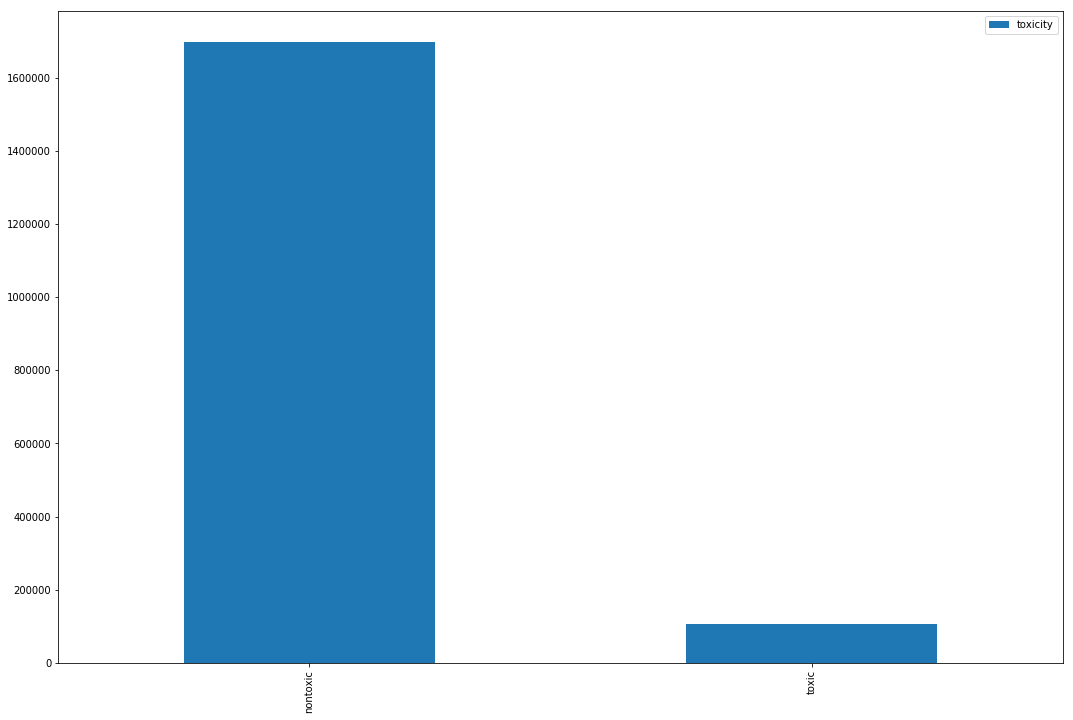

In [0]:
distribution = rawData["target"].value_counts(bins=2)
df_distribution = distribution.to_frame()
df_distribution.index = ["nontoxic","toxic"]
df_distribution = df_distribution.rename(columns={"target": "toxicity"})
df_distribution.to_csv("distribution.csv")
df_distribution.plot.bar()

### Correlation between comment length and toxicity

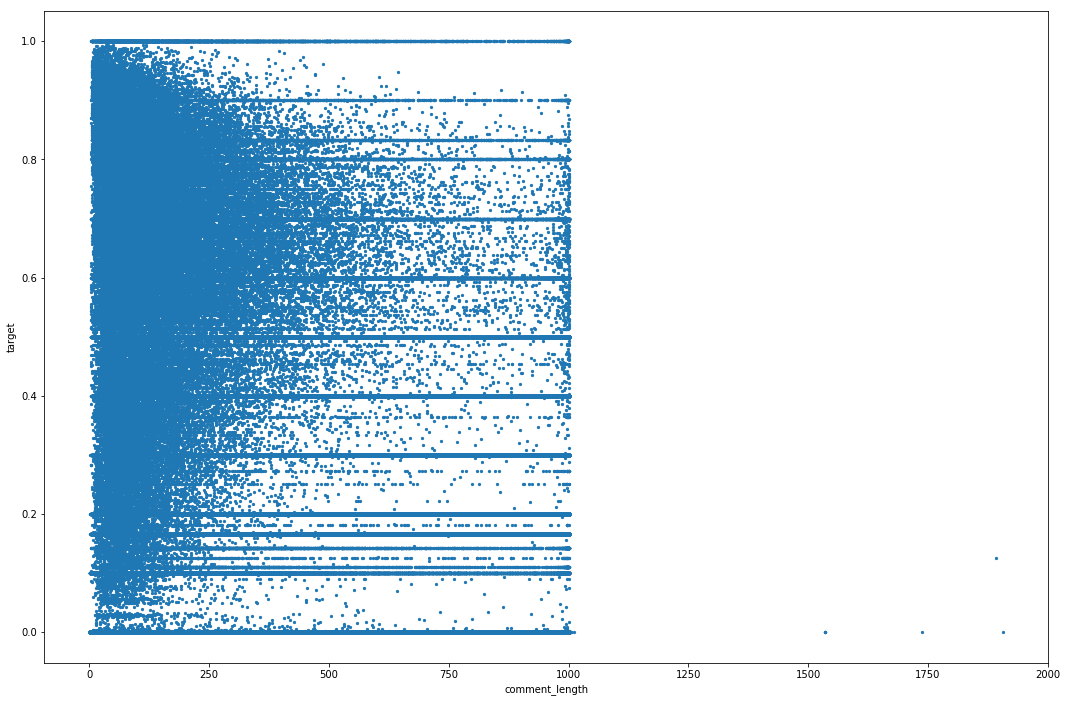

In [0]:
rawData["comment_length"] = rawData["comment_text"].apply(lambda x: len(x))
rawData.plot.scatter(x="comment_length",y="target", marker=".")
rawData[["target","comment_length"]].to_csv("length.csv")

### Number of comments according to time

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


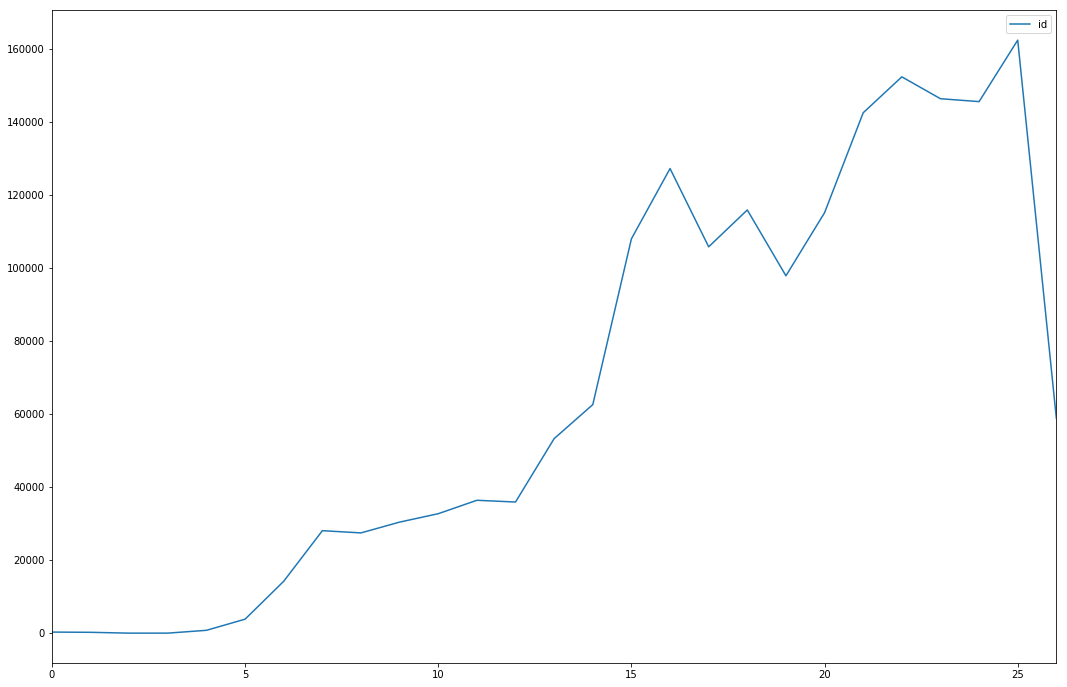

In [0]:
rawData["created_date"] = pd.to_datetime(rawData["created_date"])
rawData["created_year_month"] = rawData["created_date"].dt.to_period('M')
comment_date_df = rawData.groupby('created_year_month', as_index=False)['id'].agg('count')
comment_date_df.plot()
comment_date_df.to_csv("omment_year_month.csv")

### How toxicity changes according to time
Are people getting better or worse

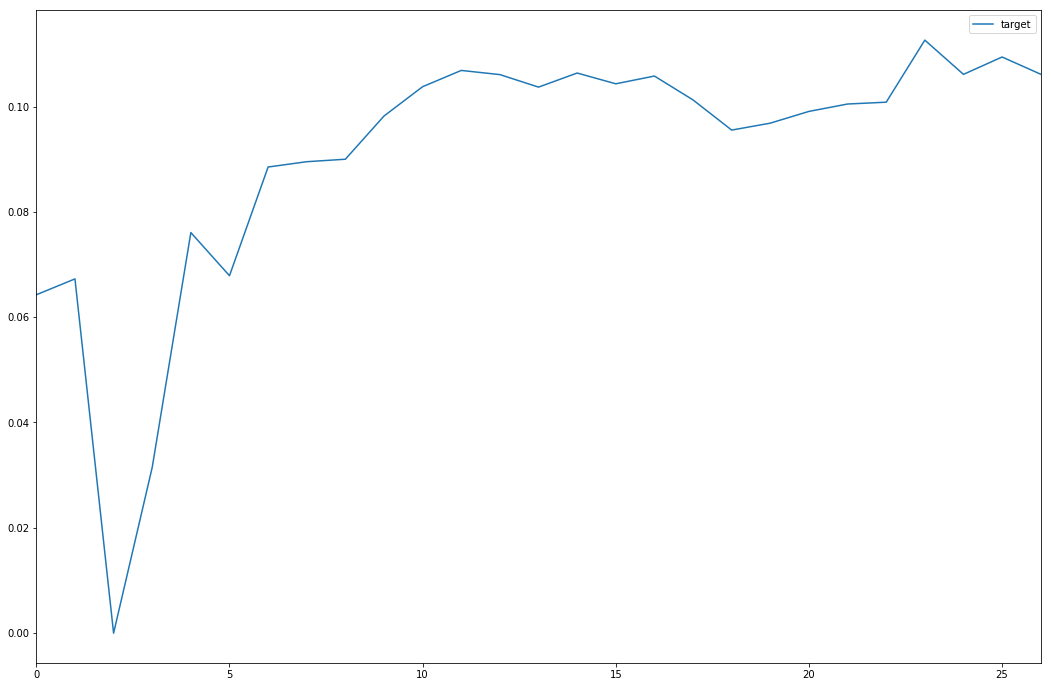

In [0]:
toxicity_date_df = rawData.groupby('created_year_month', as_index=False)['target'].agg('mean')
toxicity_date_df.plot()
toxicity_date_df.to_csv("toxicity_trend_month.csv")

![alt text](https://)### When do people become mean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


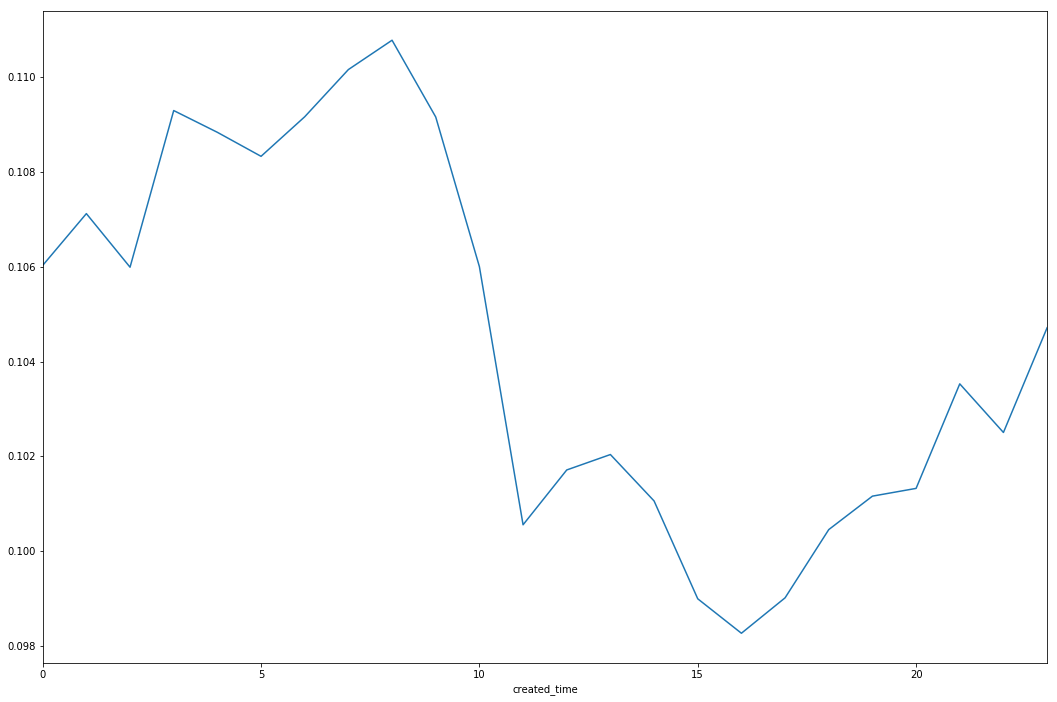

In [0]:
rawData["created_time"] = rawData["created_date"].apply(lambda x: x.  hour)
toxicity_time_df = rawData.groupby('created_time')['target'].agg('mean')
toxicity_time_df.plot()
toxicity_time_df.to_csv("toxicity_trend_hour.csv")

### When do people become mean (higher count)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


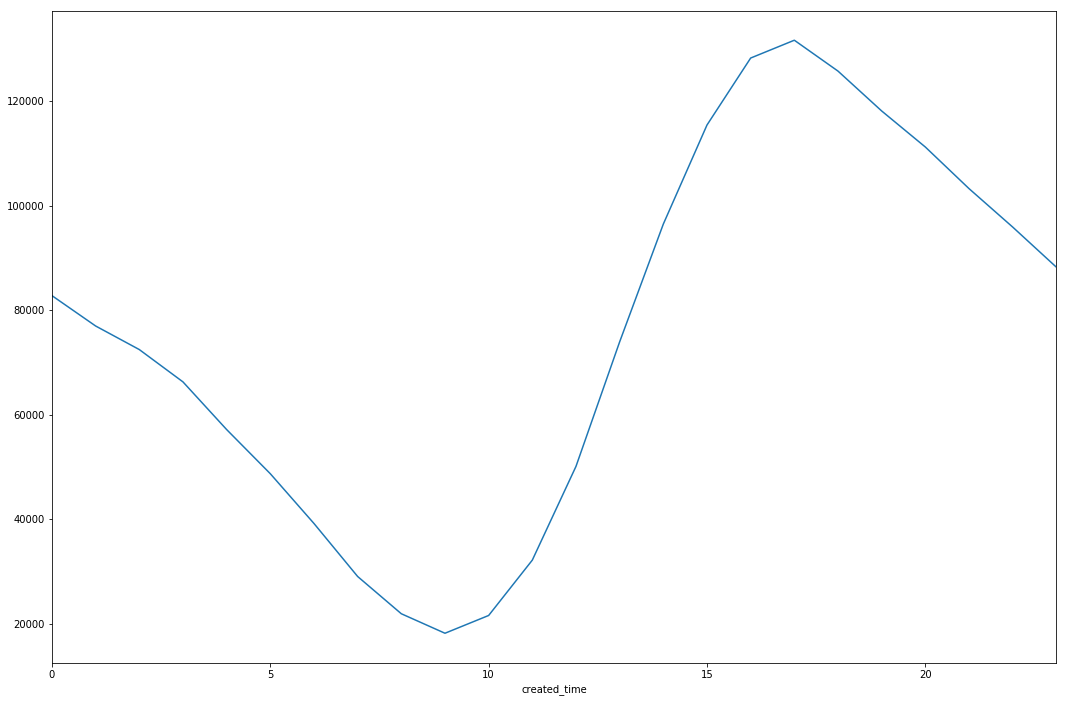

In [0]:
rawData["created_time"] = rawData["created_date"].apply(lambda x: x.  hour)
toxicity_time_count_df = rawData.groupby('created_time')['target'].agg('count')
toxicity_time_count_df.plot()
toxicity_time_count_df.to_csv("toxicity_trend_hour_count.csv")

### Disribution of race group among toxic comments

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


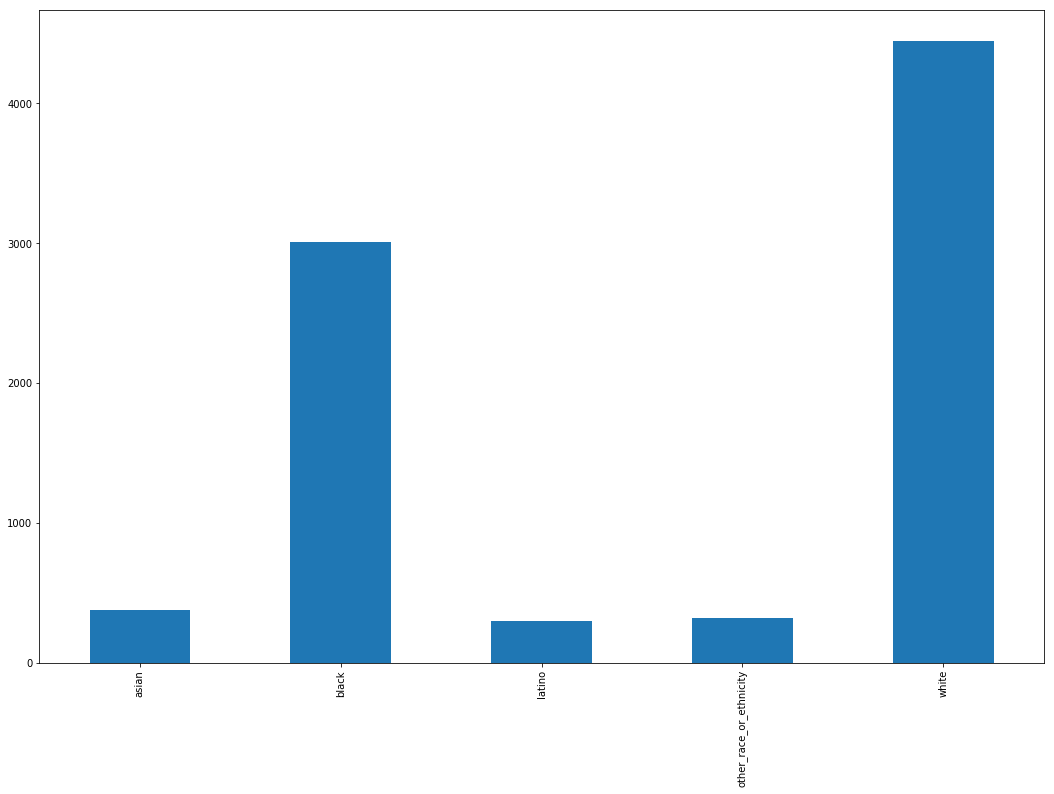

In [0]:
race_gp = ['asian', 'black', 'latino', 'other_race_or_ethnicity', 'white']
toxic_comment_df = rawData[rawData["target"] > 0.5]
summary_race = toxic_comment_df[race_gp].sum(axis = 0, skipna = True) 
summary_race.plot.bar()
summary_race.to_csv("summary_race.csv")

### How do people think about disability groups

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


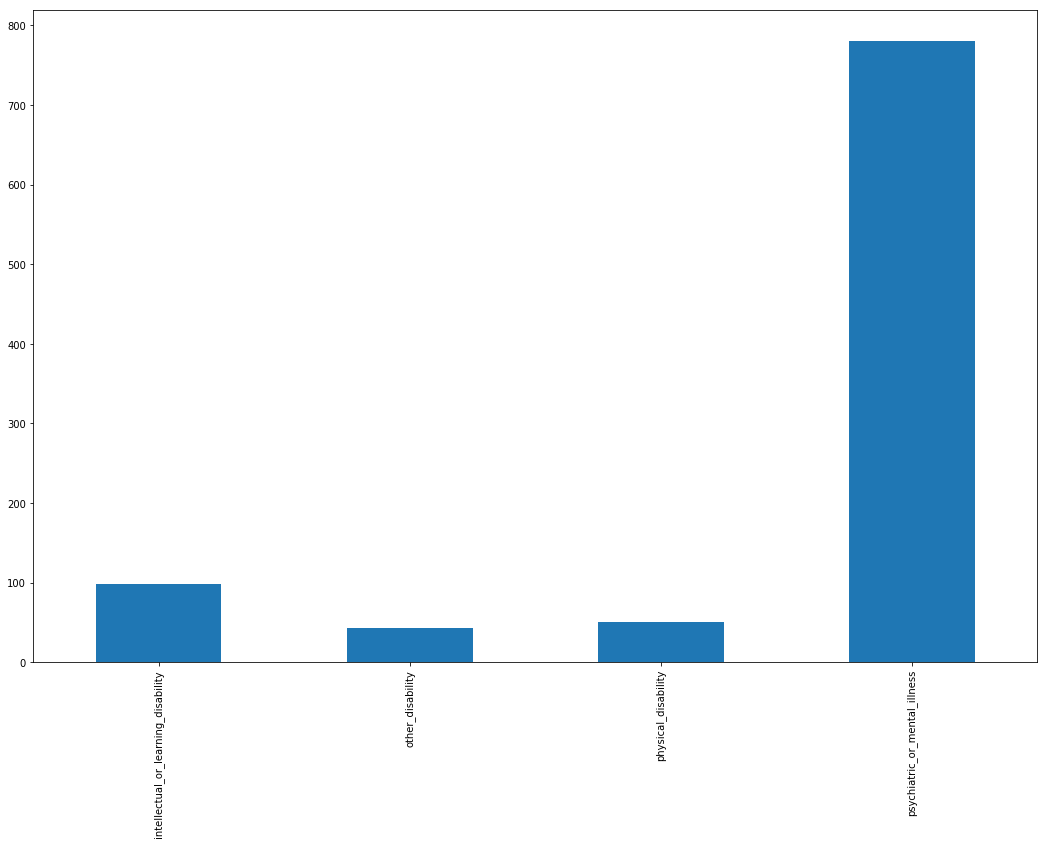

In [0]:
disability_gp = ['intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']
summary_disability = toxic_comment_df[disability_gp].sum(axis = 0, skipna = True) 
summary_disability.plot.bar()
summary_disability.to_csv("summary_disability.csv")

### Religion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


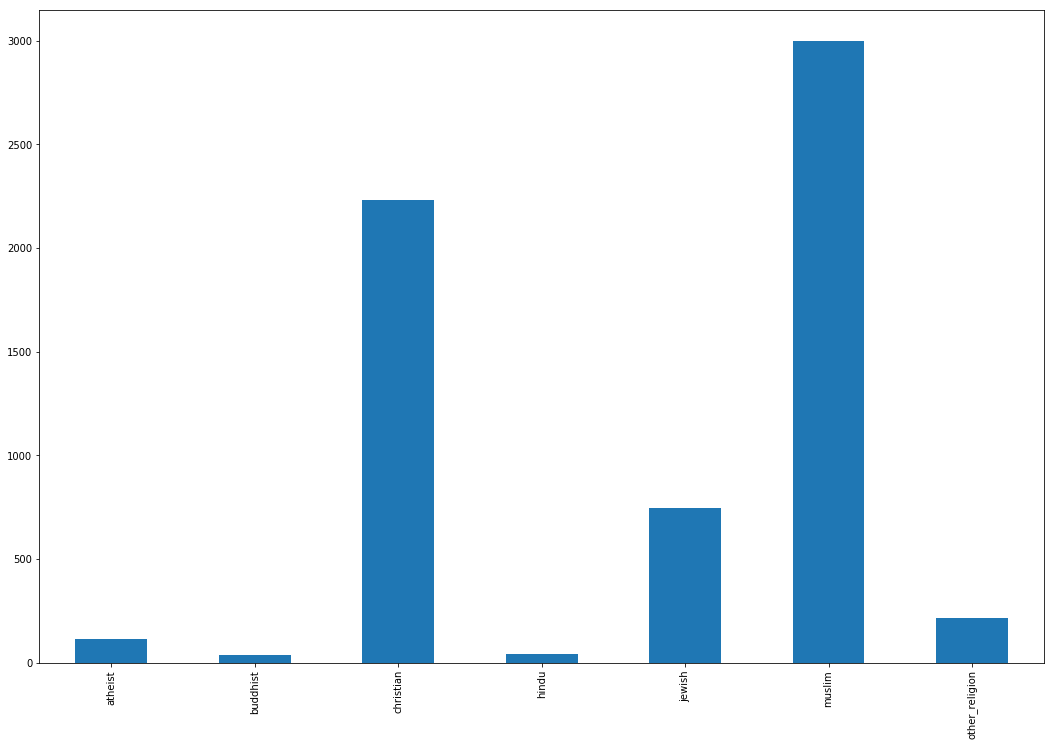

In [0]:
religion_gp = ['atheist', 'buddhist', 'christian', 'hindu', 'jewish', 'muslim', 'other_religion']
summary_religion = toxic_comment_df[religion_gp].sum(axis = 0, skipna = True) 
summary_religion.plot.bar()
summary_religion.to_csv("summary_religion.csv")

### Gender

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


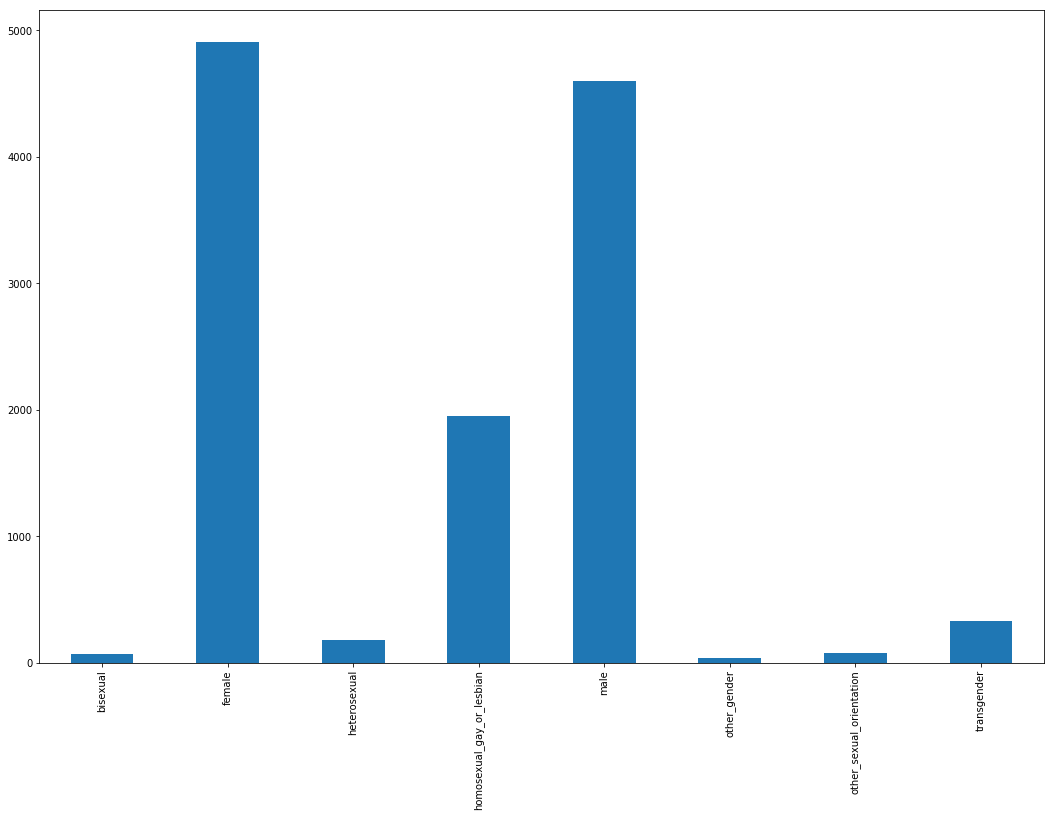

In [0]:
gender_gp = ['bisexual', 'female', 'heterosexual',  'homosexual_gay_or_lesbian', 'male', 'other_gender', 'other_sexual_orientation', 'transgender']
summary_gender = toxic_comment_df[gender_gp].sum(axis = 0, skipna = True) 
summary_gender.plot.bar()
summary_gender.to_csv("summary_gender.csv")

## Type of toxic comment

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


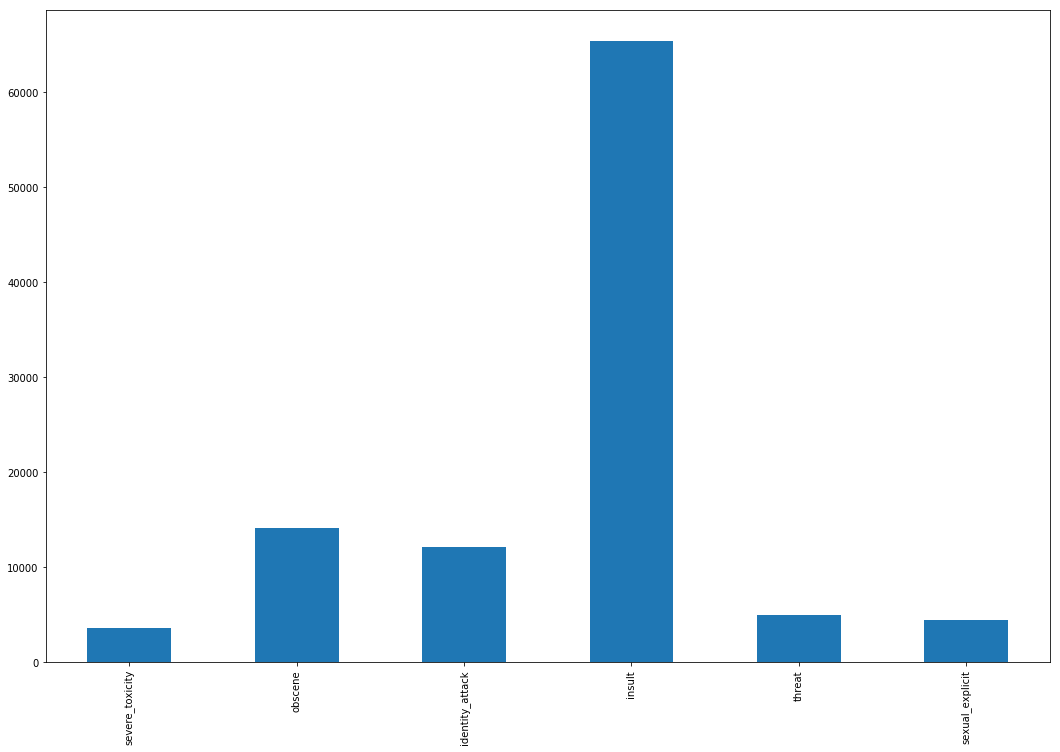

In [0]:
toxicity_gp = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat' , 'sexual_explicit']
summary_toxicity_type = toxic_comment_df[toxicity_gp].sum(axis = 0, skipna = True) 
summary_toxicity_type.plot.bar()
summary_toxicity_type.to_csv("summary_toxicity_type.csv")

## Word Count

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

data = pd.read_csv("pre_processed_comments_concise.csv")
count_vect = CountVectorizer()

toxic_comments = data[data["target"] > 0.5]
cv_fit = count_vect.fit_transform(toxic_comments ['comment_text_lemmatized'])

word_counts_df = pd.DataFrame({
    "words" : count_vect.get_feature_names(),
    "counts": np.asarray(cv_fit.sum(axis=0))[0]
})

word_counts_df.sort_values("counts",ascending=False).set_index("words").to_csv("word_count_toxic.csv")



<106438x83488 sparse matrix of type '<class 'numpy.int64'>'
	with 2240789 stored elements in Compressed Sparse Row format>